<a href="https://colab.research.google.com/github/Saliha21/Data-Science/blob/main/Project_2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Predicition for Water Quality and Potability**
>> Saliha Almalki



```
Dataset called Water Quality and Potability its contained 3276 Instances and 10 features.
Brief description: This dataset is valuable for water quality assessment.

The source: ( https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability ).

```



# 1- Data Cleaning

In [ ]:
 #Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#Read data from CSV file
data = pd.read_csv('https://filebin.net/bzu9wym9vyg83inr/water_potability.csv')
data
df = data
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
#Explore the data
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#The column
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
#Check data types
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df.isnull()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0      True     False   False        False    False         False   
1     False     False   False        False     True         False   
2     False     False   False        False     True         False   
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3271  False     False   False        False    False         False   
3272  False     False   False        False     True         False   
3273  False     False   False        False     True         False   
3274  False     False   False        False     True         False   
3275  False     False   False        False     True         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0              False            False      False       False  
1              False            False      False       False  
2              False            False      False       False  
3              False            False      False       False  
4              False            False      False       False  
...              ...              ...        ...         ...  
3271           False            False      False       False  
3272           False             True      False       False  
3273           False            False      False       False  
3274           False            False      False       False  
3275           False            False      False       False  

[3276 rows x 10 columns]

In [ ]:
#Check the null (missing values)
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64



```
# the dataset contains missing values in ph, Sulfate and Trihalomethanes columns

the dataset have 3276 rows and there is almost 1000 rows is null value
# so we have 2 options
- remove the data or
- fill the data which mean value

I will use the second options
```



In [ ]:
# replace the null value
df.fillna(df.mean(),inplace=True)

In [ ]:
#Check the null (missing values)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Total of each culumn
df.sum()

ph                 2.319668e+04
Hardness           6.433065e+05
Solids             7.211817e+07
Chloramines        2.333258e+04
Sulfate            1.093449e+06
Conductivity       1.396248e+06
Organic_carbon     4.679756e+04
Trihalomethanes    2.175143e+05
Turbidity          1.299519e+04
Potability         1.278000e+03
dtype: float64

In [ ]:
#Check for duplicate rows
df.duplicated().sum()

0

In [ ]:
#Check for outliers
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Remove outlier

In [ ]:
#Removal of outlier

df1 = df.copy()

for i in [i for i in df1.columns]:
    if df1[i].nunique()>=12:
        Q1 = df1[i].quantile(0.20)
        Q3 = df1[i].quantile(0.80)
        IQR = Q3 - Q1
        df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
        df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
df1 = df1.reset_index(drop=True)
display(df1.head())
print('Inference:Before removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('Inference:After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

In [ ]:
# Check for inconsistencies
print(df1.value_counts())

ph         Hardness    Solids        Chloramines  Sulfate     Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability
2.925174   260.458041  39233.098839  7.670149     303.402078  403.243735    11.309210       69.238445        3.678588   0             1
7.443189   193.124799  13551.953345  4.313265     333.775777  430.487296    19.396329       72.075586        2.664833   1             1
7.444914   203.068746  25489.075026  8.175744     413.560378  405.420612    13.283100       74.412867        2.571392   1             1
7.445189   225.397787  24741.534999  9.248499     333.775777  402.115616    15.535979       87.083919        3.637895   0             1
7.446089   179.146836  17763.310993  9.876515     328.459022  364.134173    12.982491       49.051241        2.948657   0             1
                                                                                                                                     ..
6.664935   218.770008  16477.350806  7.325001     299

## Correlation Matrix

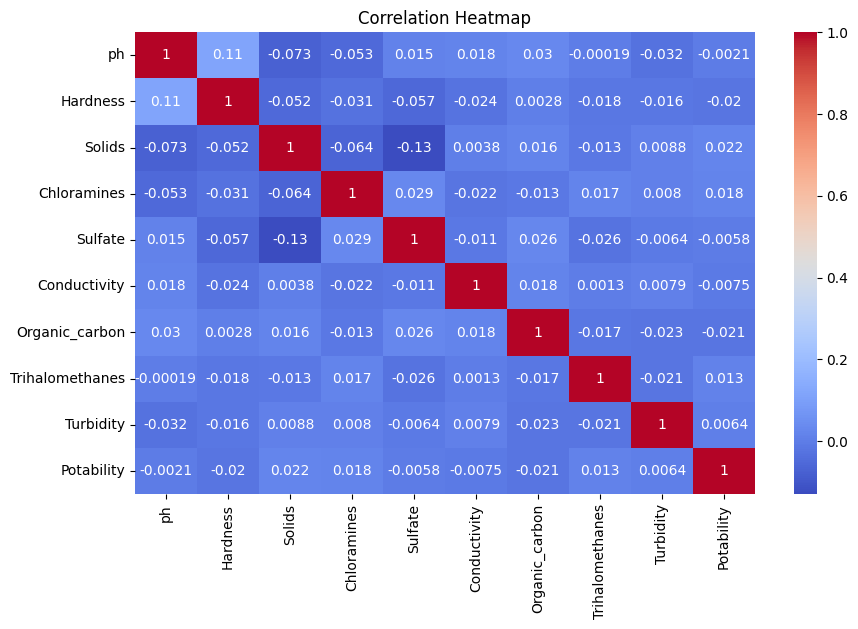

In [ ]:
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr (numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Imbalance Dataset

I will sove this problem in the section 4 by using SMOTE Technique

In [ ]:
# imbalance dataset
y = df1['Potability']
X = df1.drop('Potability', axis = 1)
y.value_counts()

0    1938
1    1200
Name: Potability, dtype: int64

# 2- Data Processing

In [ ]:
#Check data types before Processing
df1.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Normalization

In [ ]:
# Normalization of Float Value Columns
columnsToNormalize = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
scaler = StandardScaler()
df1[columnsToNormalize] = scaler.fit_transform(df1[columnsToNormalize])
df1

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0    -0.001188  0.271857 -0.125937     0.123816  1.060348      1.706506   
1    -2.458308 -2.115869 -0.381642    -0.314021 -0.008128      2.059510   
2     0.742458  0.883941 -0.230262     1.424667 -0.008128     -0.093334   
3     0.901393  0.571889  0.019245     0.623647  0.702649     -0.776937   
4     1.467680 -0.480804 -0.458673    -0.372389 -0.735196     -0.342805   
...        ...       ...       ...          ...       ...           ...   
3133 -1.763083 -0.082777  3.043634     0.035867  0.796837      1.238525   
3134  0.530487 -0.086843 -0.535480     0.624984 -0.008128     -0.416443   
3135  1.706684 -0.649721  1.336918     0.156752 -0.008128      0.072671   
3136 -1.428141  1.085403 -1.167974    -0.532549 -0.008128     -0.287559   
3137  0.578549 -0.037832 -0.526680     0.261491 -0.008128     -1.219252   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          -1.193601         1.317939  -1.288587           0  
1           0.268569        -0.645618   0.691620           0  
2           0.782931         0.000601  -1.169070           0  
3           1.260516         2.172905   0.856621           0  
4          -0.834626        -2.203756   0.143505           0  
...              ...              ...        ...         ...  
3133       -0.123028         0.017738   0.608117           1  
3134        1.707279        -0.000923  -1.500955           1  
3135       -0.992779         0.219954  -0.856180           1  
3136       -0.953218         0.709392   0.959510           1  
3137        0.561097         0.786894  -2.130870           1  

[3138 rows x 10 columns]

## Scaling

In [ ]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
df1[columnsToNormalize] = min_max_scaler.fit_transform(df1[columnsToNormalize])
df1

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.498117  0.537335  0.409749     0.507815  0.681233      0.726778   
1     0.094803  0.171345  0.366488     0.439091  0.500571      0.781030   
2     0.620180  0.631155  0.392099     0.712000  0.500571      0.450168   
3     0.646268  0.583324  0.434312     0.586270  0.620752      0.345107   
4     0.739219  0.421968  0.353456     0.429929  0.377636      0.411827   
...        ...       ...       ...          ...       ...           ...   
3133  0.208918  0.482977  0.945990     0.494010  0.636678      0.654856   
3134  0.585387  0.482354  0.340461     0.586480  0.500571      0.400510   
3135  0.778450  0.396076  0.657241     0.512985  0.500571      0.475680   
3136  0.263895  0.662035  0.233453     0.404790  0.500571      0.420318   
3137  0.593276  0.489866  0.341950     0.529425  0.500571      0.277130   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0           0.294743         0.709678   0.299943           0  
1           0.530239         0.404513   0.604719           0  
2           0.613081         0.504945   0.318338           0  
3           0.690001         0.842551   0.630115           0  
4           0.352559         0.162357   0.520358           0  
...              ...              ...        ...         ...  
3133        0.467168         0.507608   0.591867           1  
3134        0.761956         0.504708   0.267257           1  
3135        0.327087         0.539035   0.366495           1  
3136        0.333458         0.615101   0.645951           1  
3137        0.577353         0.627146   0.170306           1  

[3138 rows x 10 columns]

In [ ]:
df1.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.498117  0.537335  0.409749     0.507815  0.681233      0.726778   
1  0.094803  0.171345  0.366488     0.439091  0.500571      0.781030   
2  0.620180  0.631155  0.392099     0.712000  0.500571      0.450168   
3  0.646268  0.583324  0.434312     0.586270  0.620752      0.345107   
4  0.739219  0.421968  0.353456     0.429929  0.377636      0.411827   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.294743         0.709678   0.299943           0  
1        0.530239         0.404513   0.604719           0  
2        0.613081         0.504945   0.318338           0  
3        0.690001         0.842551   0.630115           0  
4        0.352559         0.162357   0.520358           0

In [ ]:
df1.describe() #after normalization

ph     Hardness       Solids  Chloramines      Sulfate  \
count  3138.000000  3138.000000  3138.000000  3138.000000  3138.000000   
mean      0.498312     0.495665     0.431056     0.488381     0.501946   
std       0.164167     0.153304     0.169211     0.156988     0.169110   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.403276     0.402918     0.307217     0.387978     0.417992   
50%       0.498117     0.498593     0.411294     0.489453     0.500571   
75%       0.589738     0.591798     0.537278     0.590044     0.585416   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3138.000000     3138.000000      3138.000000  3138.000000  3138.000000  
mean       0.464512        0.486983         0.504851     0.498271     0.382409  
std        0.153711        0.161085         0.155439     0.153936     0.486053  
min        0.000000        0.000000         0.000000     0.000000     0.000000  
25%        0.349257        0.378755         0.409136     0.394386     0.000000  
50%        0.455613        0.483854         0.504708     0.494983     0.000000  
75%        0.570537        0.598572         0.606598     0.603503     1.000000  
max        1.000000        1.000000         1.000000     1.000000     1.000000

## save cleaned dataset

In [ ]:
#save cleaned dataset
df1.to_csv('cleaned_WQandPotability.csv')

# 3- Data Visualization

In [ ]:
df2 = pd. read_csv('https://filebin.net/bzu9wym9vyg83inr/cleaned_WQandPotability.csv')
df2.head()

Unnamed: 0        ph  Hardness    Solids  Chloramines   Sulfate  \
0           0  0.498117  0.537335  0.409749     0.507815  0.681233   
1           1  0.094803  0.171345  0.366488     0.439091  0.500571   
2           2  0.620180  0.631155  0.392099     0.712000  0.500571   
3           3  0.646268  0.583324  0.434312     0.586270  0.620752   
4           4  0.739219  0.421968  0.353456     0.429929  0.377636   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0      0.726778        0.294743         0.709678   0.299943           0  
1      0.781030        0.530239         0.404513   0.604719           0  
2      0.450168        0.613081         0.504945   0.318338           0  
3      0.345107        0.690001         0.842551   0.630115           0  
4      0.411827        0.352559         0.162357   0.520358           0

In [ ]:
del df2['Unnamed: 0']

In [ ]:
df2.head()

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.498117  0.537335  0.409749     0.507815  0.681233      0.726778   
1  0.094803  0.171345  0.366488     0.439091  0.500571      0.781030   
2  0.620180  0.631155  0.392099     0.712000  0.500571      0.450168   
3  0.646268  0.583324  0.434312     0.586270  0.620752      0.345107   
4  0.739219  0.421968  0.353456     0.429929  0.377636      0.411827   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.294743         0.709678   0.299943           0  
1        0.530239         0.404513   0.604719           0  
2        0.613081         0.504945   0.318338           0  
3        0.690001         0.842551   0.630115           0  
4        0.352559         0.162357   0.520358           0

##Boxplot

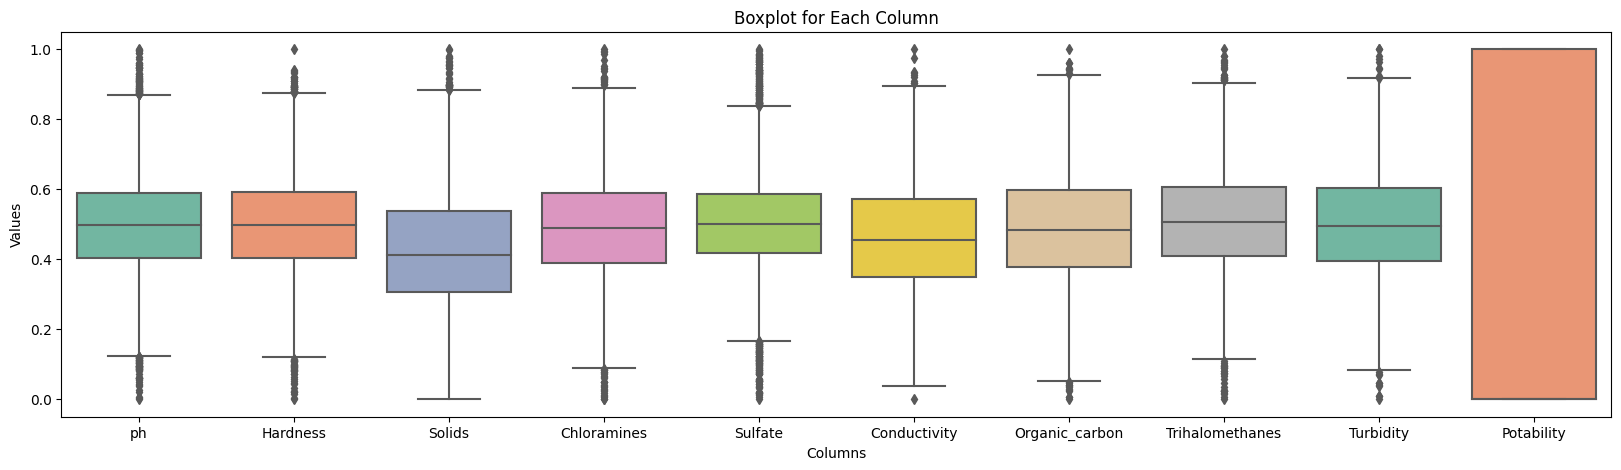

In [ ]:
#Set the matplotlib
plt.figure(figsize=(20, 5))
#Create boxplots for each column using seaborn
sns.boxplot(data=df2, orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

##Histogram

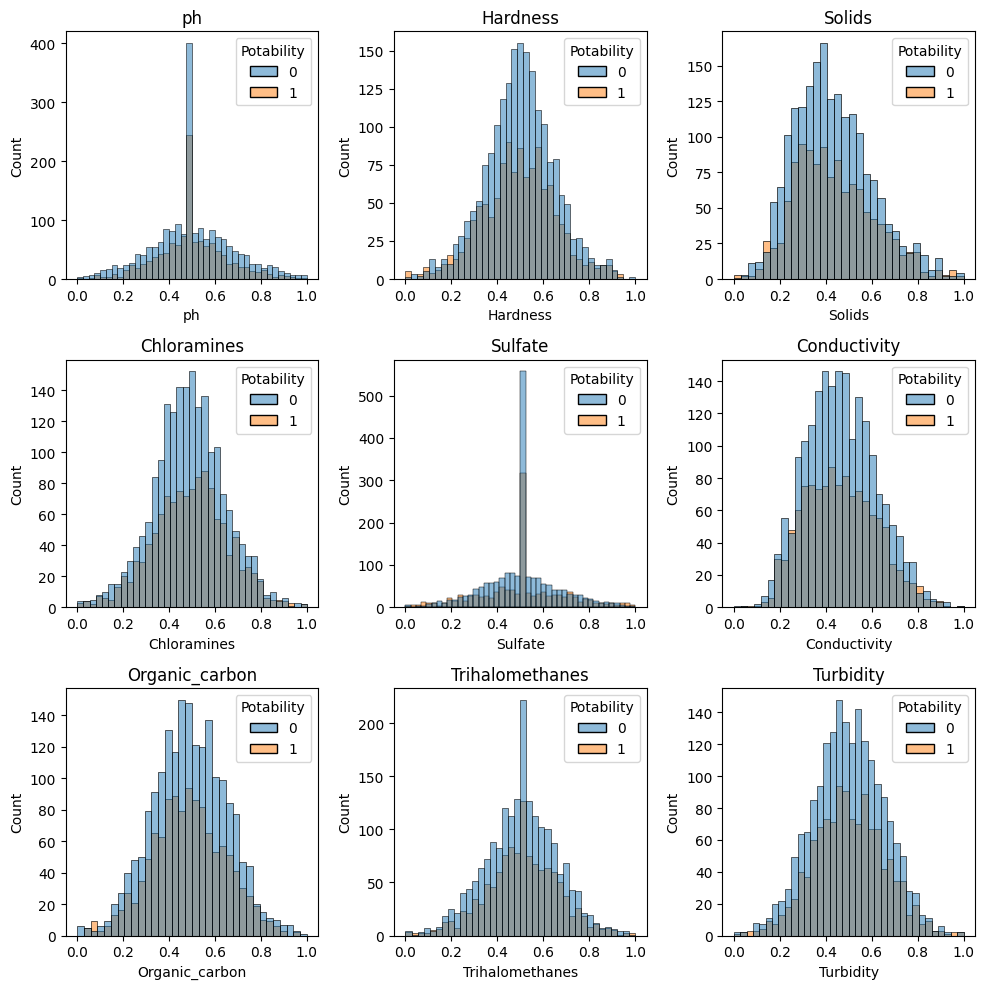

In [ ]:
# Create Histogram for each features by Potability

fig = plt.figure(figsize=(10,10))
feature=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i in range(len(feature)):
    plt.subplot(3,3,i+1)
    plt.title(feature[i])
    sns.histplot(data=df2,x=df2[feature[i]],hue='Potability')
plt.tight_layout()
plt.show()

## Scatterplot

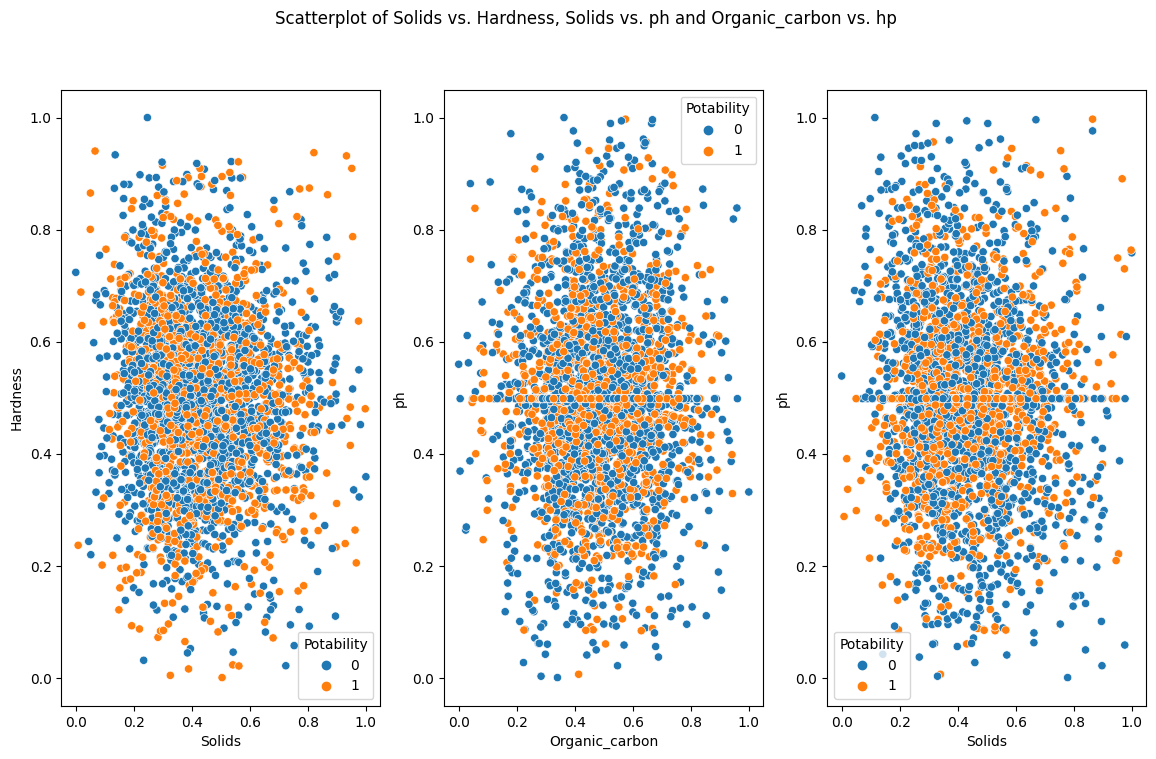

In [ ]:
# Create Scatterplot

fig, ax = plt.subplots(1,3,figsize = (14,8))

sns.scatterplot(data = df2, x = "Solids", y = "Hardness", hue = "Potability", ax = ax[0])
sns.scatterplot(data = df2, x = 'Organic_carbon', y = 'ph', hue = 'Potability', ax = ax[1])
sns.scatterplot(data = df2, x = "Solids", y = "ph",hue = "Potability", ax = ax[2])
plt.suptitle("Scatterplot of Solids vs. Hardness, Solids vs. ph and Organic_carbon vs. hp")
plt.show()

##Pairplot

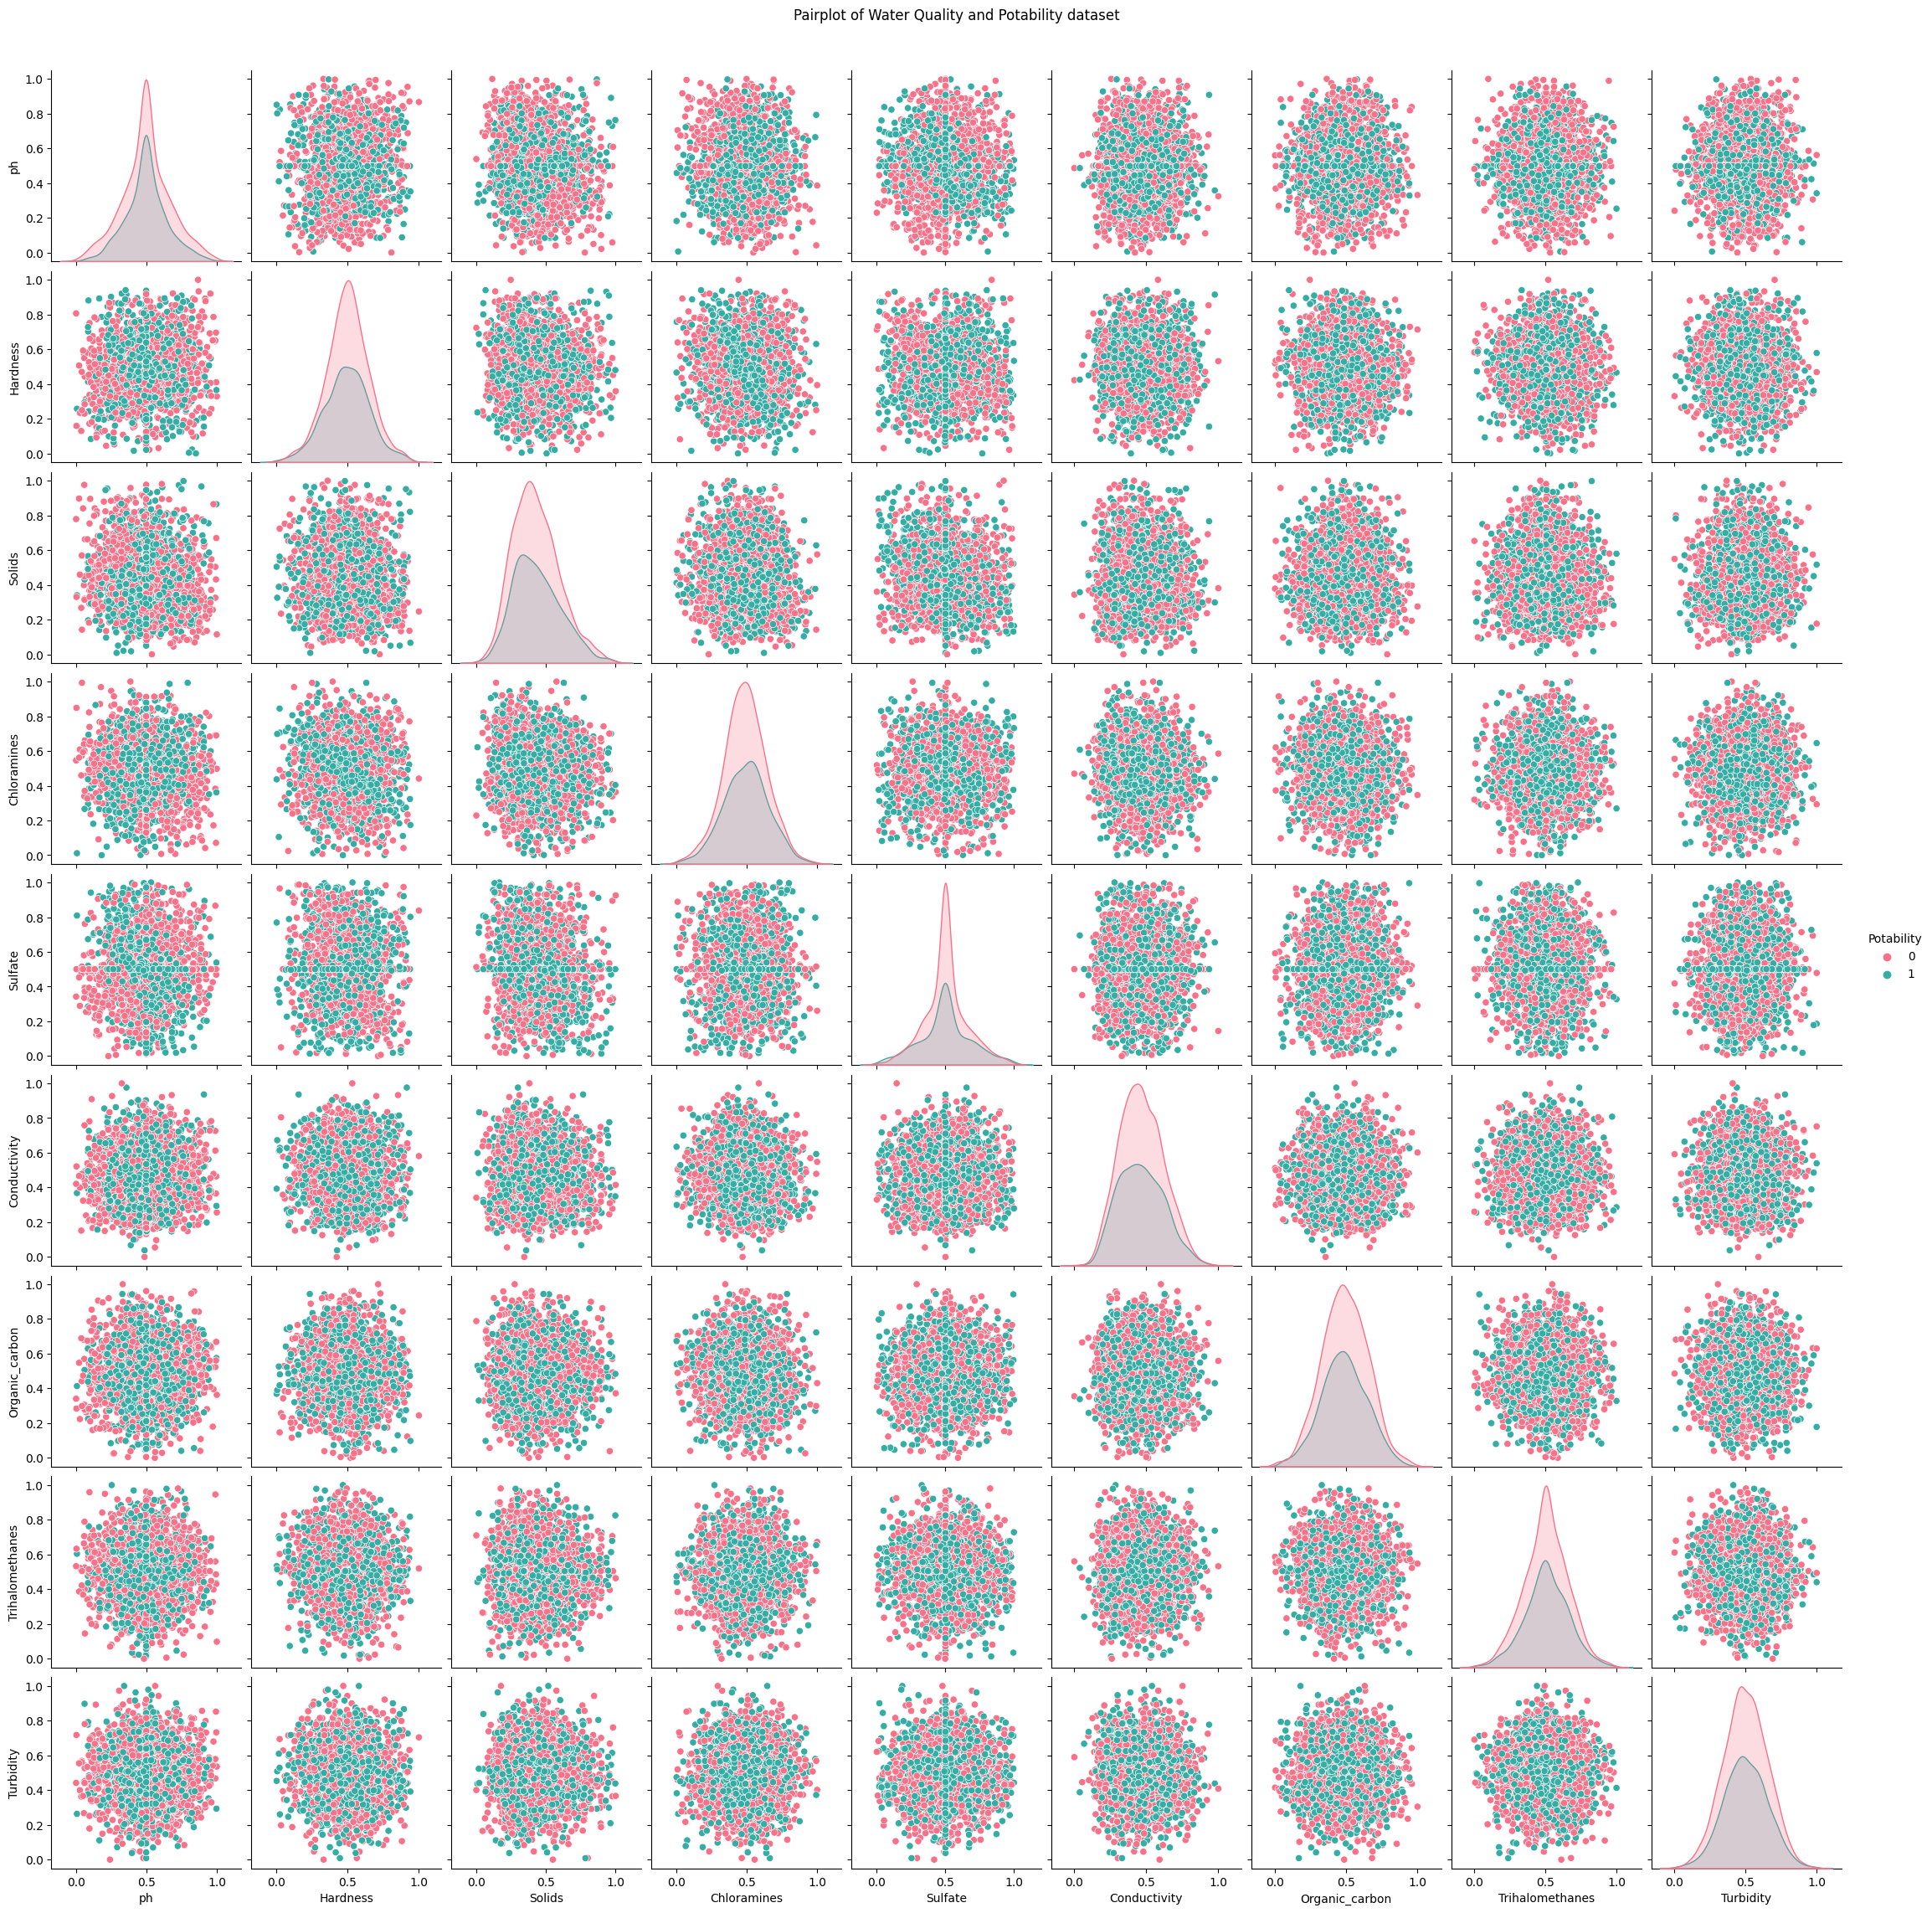

In [ ]:
# Pairplot: Scatterplot Matrix
sns.pairplot(df2, hue="Potability", palette="husl")
plt.suptitle("Pairplot of Water Quality and Potability dataset", y=1.02)
plt.show()

# 4- ML Modeling



```
# Problem statement:
This project aims to classify water sample as potable(1) or not potable(0)
```



```
# There are no strong correlation among features.
```



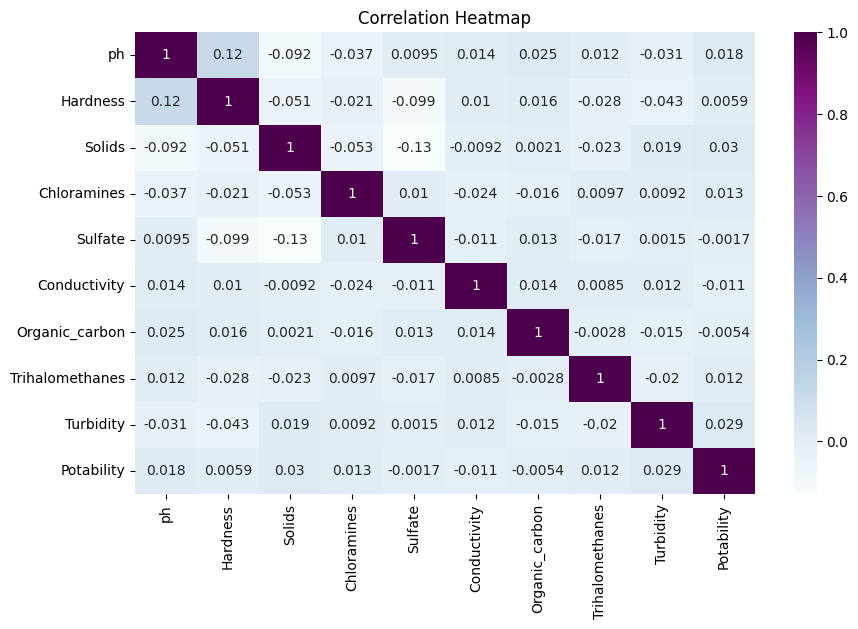

In [ ]:
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr (numeric_only=True), annot=True, cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
y = df2['Potability'] # target
X = df2.drop('Potability', axis = 1 )
X

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0     0.498117  0.537335  0.409749     0.507815  0.681233      0.726778   
1     0.094803  0.171345  0.366488     0.439091  0.500571      0.781030   
2     0.620180  0.631155  0.392099     0.712000  0.500571      0.450168   
3     0.646268  0.583324  0.434312     0.586270  0.620752      0.345107   
4     0.739219  0.421968  0.353456     0.429929  0.377636      0.411827   
...        ...       ...       ...          ...       ...           ...   
3133  0.208918  0.482977  0.945990     0.494010  0.636678      0.654856   
3134  0.585387  0.482354  0.340461     0.586480  0.500571      0.400510   
3135  0.778450  0.396076  0.657241     0.512985  0.500571      0.475680   
3136  0.263895  0.662035  0.233453     0.404790  0.500571      0.420318   
3137  0.593276  0.489866  0.341950     0.529425  0.500571      0.277130   

      Organic_carbon  Trihalomethanes  Turbidity  
0           0.294743         0.709678   0.299943  
1           0.530239         0.404513   0.604719  
2           0.613081         0.504945   0.318338  
3           0.690001         0.842551   0.630115  
4           0.352559         0.162357   0.520358  
...              ...              ...        ...  
3133        0.467168         0.507608   0.591867  
3134        0.761956         0.504708   0.267257  
3135        0.327087         0.539035   0.366495  
3136        0.333458         0.615101   0.645951  
3137        0.577353         0.627146   0.170306  

[3138 rows x 9 columns]

## SMOTE Technique

It tackles imbalance data problem by generating synthetic samples for minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Fit and apply the transform
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

0    1938
1    1938
Name: Potability, dtype: int64

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)


lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")

print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.4948453608247423
Confusion Matrix : 
[[171 221]
 [171 213]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.44      0.47       392
           1       0.49      0.55      0.52       384

    accuracy                           0.49       776
   macro avg       0.50      0.50      0.49       776
weighted avg       0.50      0.49      0.49       776



## KNN Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.6765463917525774
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       392
           1       0.65      0.74      0.69       384

    accuracy                           0.68       776
   macro avg       0.68      0.68      0.68       776
weighted avg       0.68      0.68      0.68       776



## Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.6353092783505154
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       392
           1       0.62      0.66      0.64       384

    accuracy                           0.64       776
   macro avg       0.64      0.64      0.64       776
weighted avg       0.64      0.64      0.64       776



## Random Forest Classifier

In [ ]:
rd_clf = RandomForestClassifier(criterion = "entropy")
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")

print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7396907216494846
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       392
           1       0.74      0.74      0.74       384

    accuracy                           0.74       776
   macro avg       0.74      0.74      0.74       776
weighted avg       0.74      0.74      0.74       776



# 5- Final Results

## Models Comparison

In [ ]:
#create dataframe
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3  Random Forest Classifier  0.739691
1                       KNN  0.676546
2  Decision Tree Classifier  0.635309
0       Logistic Regression  0.494845

In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly', title = 'Models Comparison')

In [ ]:
line = px.line(data_frame=models, y = ['Score'], markers = True)
line.update_xaxes(title = "Model", rangeslider_visible = False)
line.update_yaxes(title = "Score")
line.update_traces(line_color="blue")
line.update_layout(showlegend=True,
                   title = {
                       'text': 'Score vs Model',
                       'y': 0.94,
                       'x': 0.5,
                       'xanchor': 'center',
                       'yanchor': 'top'
                   })
line.show()